In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\dell\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [6]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [5]:
pip install matplotlib

  Using cached matplotlib-3.4.2-cp39-cp39-win_amd64.whl (7.1 MB)
  Using cached kiwisolver-1.3.1-cp39-cp39-win_amd64.whl (51 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\dell\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [8]:
(X_train,y_train),(X_test,y_test) =datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2519s 15us/step


In [9]:
X_train.shape

(50000, 32, 32, 3)

In [20]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [62]:
def plot_sample(X,y,index):
    
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

In [32]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [33]:
y_train=y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

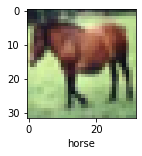

In [35]:
plot_sample(X_train,y_train,7)

In [36]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [37]:
X_train=X_train/255
X_test=X_test/255

In [39]:
cnn=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax'),
    
])

In [40]:
cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [48]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.3624 - accuracy: 0.8707
Epoch 2/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.3414 - accuracy: 0.8775
Epoch 3/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.3321 - accuracy: 0.8812
Epoch 4/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.3165 - accuracy: 0.8857
Epoch 5/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.3030 - accuracy: 0.8908
Epoch 6/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.2982 - accuracy: 0.8914
Epoch 7/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.2793 - accuracy: 0.8985
Epoch 8/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.2789 - accuracy: 0.8993
Epoch 9/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.2643 - accuracy: 0.9045
Epoch 10/10
1563/1563 [==============================] - 28s 18m

In [49]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.7015 - accuracy: 0.6658


[1.7015371322631836, 0.6657999753952026]

In [50]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

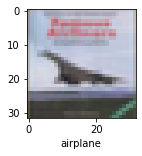

In [64]:
plot_sample(X_test,y_test,3)

In [60]:
classes[y_test[1]]

'ship'